In [1]:
library(KFAS)

# Data

In [25]:
Weight <- ts(scan("leadingDAT_src/Weight.dat"))
WeightNA <- Weight[c(1:20,rep(NA,20),41:60)]
Bodyfat <- ts(scan("leadingDAT_src/Bodyfat.dat"))

# Model Definition

### Note:
* Q,H are symmetric matrix and have 3 unknown params respectively,   
which means there are 6 params in total

In [26]:
modSUTSE <- SSModel(cbind(WeightNA,Bodyfat) ~ SSMtrend(1,Q=matrix(NA,2,2)),H=matrix(NA,2,2))

In [27]:
fitSUTSE <- fitSSM(modSUTSE,numeric(6),method="BFGS")

In [28]:
kfsSUTSE <- KFS(fitSUTSE$model)

In [29]:
confSUTSE <- predict(fitSUTSE$model,interval="confidence",level=.95)
preSUTSE <- predict(fitSUTSE$model,interval="prediction",level=.95)

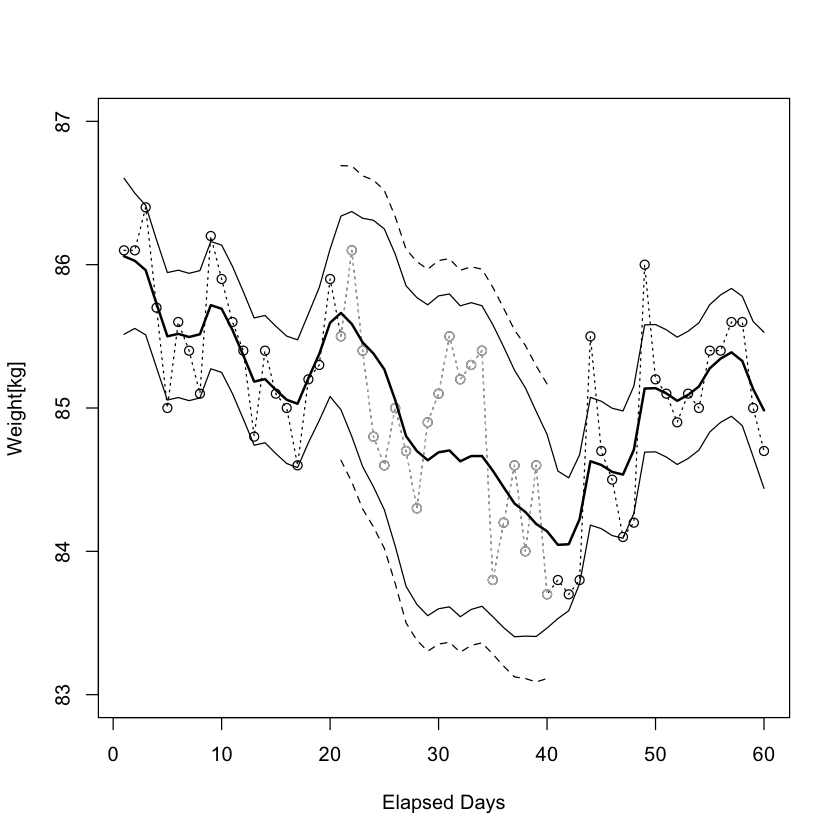

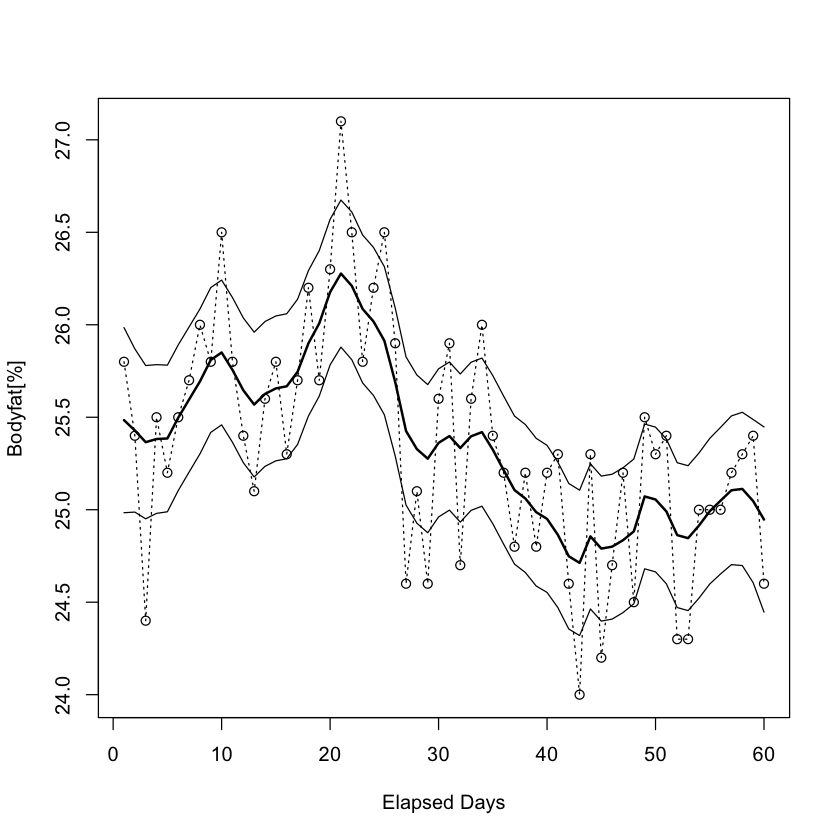

In [47]:
plot(Weight,type="o",lty=3,xlab="Elapsed Days",ylab="Weight[kg]",ylim=c(83,87))
lines(21:40,Weight[21:40],type="o",lty=3,col=8)
lines(confSUTSE$WeightNA[,1],lwd=2)
lines(confSUTSE$WeightNA[,2])
lines(confSUTSE$WeightNA[,3])
lines(21:40,preSUTSE$WeightNA[21:40,2],lty=2)
lines(21:40,preSUTSE$WeightNA[21:40,3],lty=2)

plot(Bodyfat,type="o",lty=3,xlab="Elapsed Days",ylab="Bodyfat[%]")
lines(confSUTSE$Bodyfat[,1],lwd=2)
lines(confSUTSE$Bodyfat[,2])
lines(confSUTSE$Bodyfat[,3])


In [48]:
fitSUTSE$optim.out$par

[1] -2.5771202 -3.7459452  0.1221628 -1.8574087 -1.7691077  0.1401478

In [49]:
fitSUTSE$optim.out$value

[1] 78.1867

In [50]:
fitSUTSE$model$Q

, , 1

           [,1]       [,2]
[1,] 0.07599253 0.03367631
[2,] 0.03367631 0.03853706

In [51]:
fitSUTSE$model$H

, , 1

           [,1]       [,2]
[1,] 0.15607655 0.05536752
[2,] 0.05536752 0.19012644